In [1]:
# load json file as dictionary
import json
import sys
import pandas as pd
import numpy as np
import re

from umap import UMAP
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
import bertopic
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, PartOfSpeech
from bertopic.vectorizers import ClassTfidfTransformer


import matplotlib.pyplot as plt


/Users/christinaziegler/anaconda3/envs/base3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
patents_text = pd.read_csv("patents_text_topic_modelling2.csv")

/var/folders/jy/j77v476x03737ryp7gll_0p00000gn/T/ipykernel_36881/3127923996.py:1: DtypeWarning: Columns (18,20,21,23,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  patents_text = pd.read_csv("patents_text_topic_modelling2.csv")


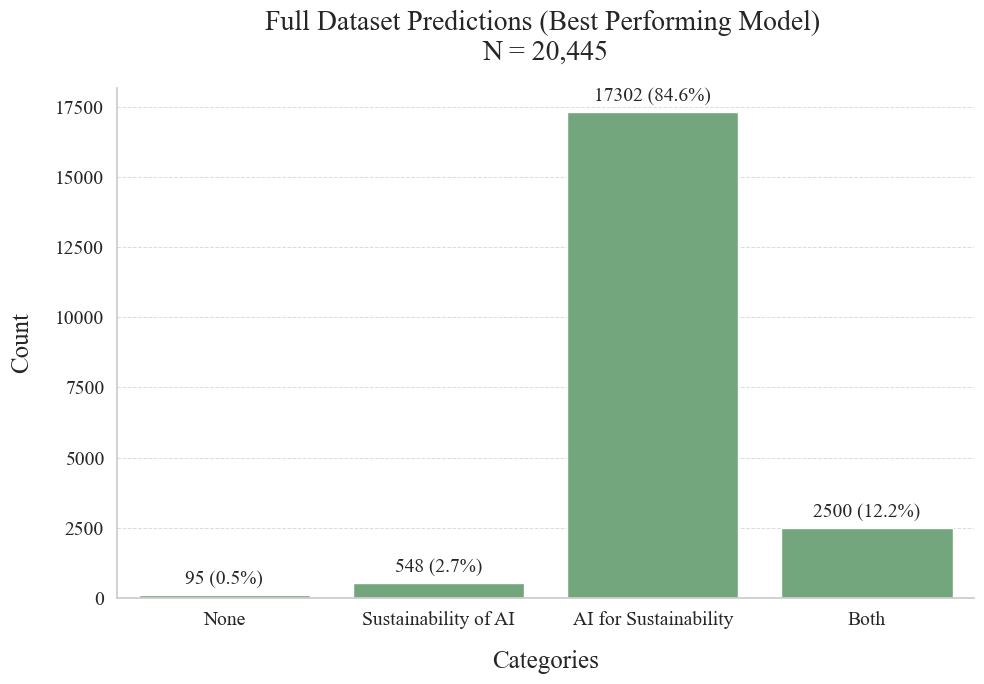

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame creation (you should replace this with your actual DataFrame)
# patents_text = pd.DataFrame({'SofAI': [0, 1, 0, 1, 1], 'AIforS': [0, 0, 1, 1, 0]})

# Convert to integer type
patents_text['SofAI'] = patents_text['SofAI'].astype(int)
patents_text['AIforS'] = patents_text['AIforS'].astype(int)

# Create a contingency table
contingency_table = pd.crosstab(patents_text['SofAI'], patents_text['AIforS'])

# Calculate the counts for each category
none_count = contingency_table.loc[0, 0] if 0 in contingency_table.index and 0 in contingency_table.columns else 0
one_category_sofai_count = contingency_table.loc[1, 0] if 1 in contingency_table.index and 0 in contingency_table.columns else 0
one_category_aifors_count = contingency_table.loc[0, 1] if 0 in contingency_table.index and 1 in contingency_table.columns else 0
both_count = contingency_table.loc[1, 1] if 1 in contingency_table.index and 1 in contingency_table.columns else 0

# Data for the bar chart
categories = ['None', 'Sustainability of AI', 'AI for Sustainability', 'Both']
counts = [none_count, one_category_sofai_count, one_category_aifors_count, both_count]

# Calculate total count
total_count = sum(counts)

# Calculate percentages
percentages = [(count / total_count) * 100 for count in counts]

# Set up the Seaborn style
sns.set(style="whitegrid")

# Create the bar chart
plt.figure(figsize=(10, 7))
ax = sns.barplot(x=categories, y=counts, palette=["#6bae77"])

# Title and labels
plt.title('Full Dataset Predictions (Best Performing Model) \nN = 20,445', family="Times New Roman", fontsize=20, pad=20)
plt.xlabel('Categories', family="Times New Roman", fontsize=18, labelpad=15)
plt.ylabel('Count', family="Times New Roman", fontsize=18, labelpad=15)

# Set font properties for tick labels
plt.xticks(fontname='Times New Roman', fontsize=14)
plt.yticks(fontname='Times New Roman', fontsize=14)

# Add gridlines for better readability
ax.yaxis.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
ax.xaxis.grid(False)

# Add annotations with counts and percentages
for bar, count, percentage in zip(ax.patches, counts, percentages):
    height = bar.get_height()
    ax.annotate(f'{int(count)} ({percentage:.1f}%)',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # 5 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=14, family='Times New Roman')

# Remove the top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()


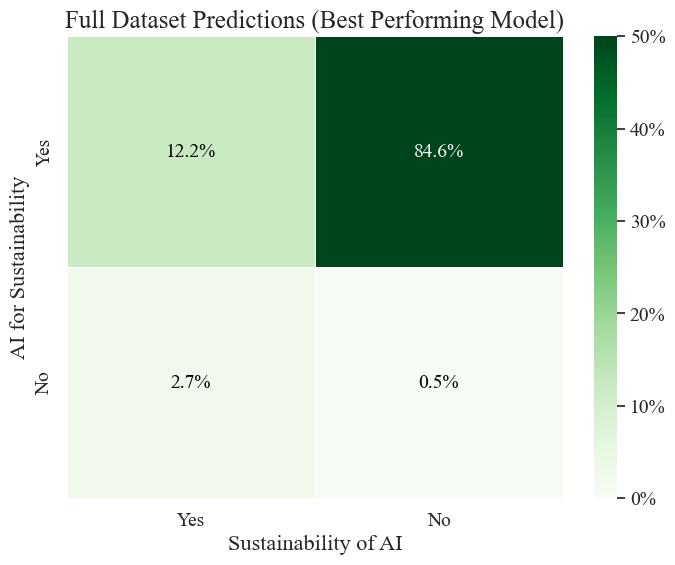

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Manually create a 4x4 DataFrame
data = {
    'Yes': [2500, 548],
    'No': [17302, 95]
}
custom_matrix = pd.DataFrame(data, index=["Yes", "No"])

# Normalize the data to get percentages
total = custom_matrix.to_numpy().sum()
custom_matrix_percent = custom_matrix / total * 100

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Use a continuous colormap with capped range
ax = sns.heatmap(custom_matrix_percent, annot=False, cmap="Greens", linewidths=.5, cbar_kws={'format': '%.0f%%'}, vmin=0, vmax=50)

# Set font properties for tick labels
for item in ax.get_yticklabels():
    item.set_fontname('Times New Roman')
    item.set_fontsize(14)  # Increase tick label size
for item in ax.get_xticklabels():
    item.set_fontname('Times New Roman')
    item.set_fontsize(14)

# Manually add annotations with Times New Roman font
for i in range(custom_matrix.shape[0]):
    for j in range(custom_matrix.shape[1]):
        value = custom_matrix.iloc[i, j]
        percent = custom_matrix_percent.iloc[i, j]
        font_color = 'white' if custom_matrix_percent.iloc[i, j] > 25 else 'black'
        ax.text(j + 0.5, i + 0.5, f'{percent:.1f}%', 
                ha='center', va='center', color=font_color, fontsize=14, family='Times New Roman')

# Title and labels
plt.title('Full Dataset Predictions (Best Performing Model)', family="Times New Roman", fontsize=18)
plt.xlabel('Sustainability of AI', family="Times New Roman", fontsize=16)
plt.ylabel('AI for Sustainability', family="Times New Roman", fontsize=16)

# Customize the legend (colorbar) font
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)  # Increase colorbar tick label size

# Set colorbar tick labels font to Times New Roman
labels = cbar.ax.get_yticklabels()
for label in labels:
    label.set_fontname('Times New Roman')
cbar.ax.set_yticklabels(labels)

# Show the plot
plt.show()
